<a href="https://colab.research.google.com/github/yraj1996/netflix-movies-and-tv-shows-clustering/blob/main/Netflix_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies And TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**           - Yash Raj


# **Project Summary -**

The goal of this project is to analyze the Netflix Dataset of movies and TV shows till 2019, which was sourced from the third-party search engine Flixable, and group them into relevant clusters, with the help of NLP. This will aid in enhancing the user experience with the help of recommendation system, and this can prevent subscriber churn from the world's largest online streaming service provider, Netflix, which currently boasts over 220 million subscribers. The dataset will also be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.

Our project is divided into several parts :

* The first stage is to underatand the dataset that involves data inspection which included first view of data,looking for missing values and duplicate values.
* The next stage involved exploratory data analysis, where trends and patterns in the data were identified. Distribution of data was also studied.
* Hypothesis Testing was performed.
* After this Textudal Preprocessing of data was done by removing Punctuations, Urls and white space,stopwords, applying tokenization and vectorzation of textual data.
* Furthur, used PCA for dimensionality reduction and after that implement unsuvervised MaL model K-Means clustering and agglomerative hierarchical clustering.
* Afer that we created a content-based recommender system using the similarity matrix obtained through cosine similarity. This system provides personalized recommendations based on the type of show the user has watched.

* we evaluate and compare the Silhoutte Score for both model and choose the best ones.

* Afer that we created a content-based recommender system using the similarity matrix obtained through cosine similarity. This system provides personalized recommendations based on the type of show the user has watched.

# **GitHub Link -**

https://github.com/yraj1996/netflix-movies-and-tv-shows-clustering

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.**

**In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

**Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ALMA BETTER Capstone Project/Netflix movies and tv shows clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
director      30.68
cast           9.22
country        6.51
date_added     0.13
rating         0.09
dtype: float64


<Axes: >

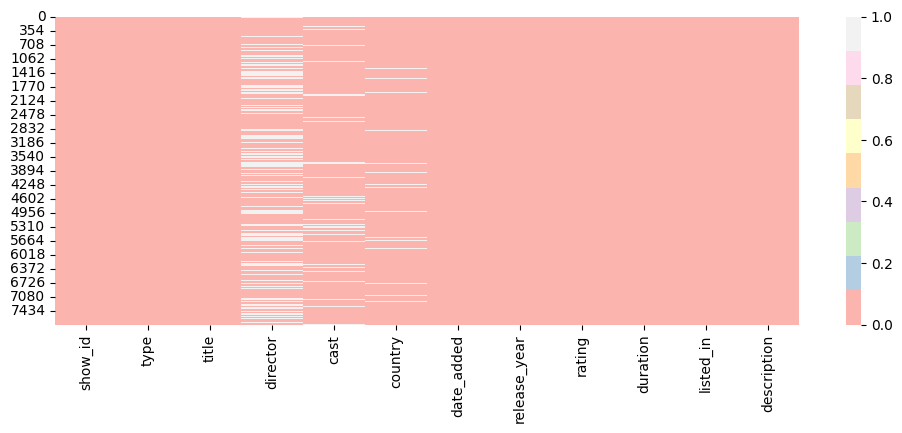

In [9]:
# Visualizing the missing values
plt.figure(figsize=(12,4))
sns.heatmap(df.isna(),cmap='Pastel1')

### What did you know about your dataset?

The given dataset is from the online streaming industry. Our task is to examine the dataset, build the clustering methods and content based recommendation system.
 
* There are 7787 rows and 12 columns in the dataset.
* The dataset does not contain any duplicate values.
* In the director, cast, country, date_added, and rating columns, there are missing values.
* Director column has more number of missing values that is 30.68% followed by cast (9.22%) and country( 6.51%).

I am going to handle the missing and null vlaues in Data wrangling section.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description 

* show_id : Unique ID for every Movie/Show
* type : Identifier - Movie/Show
* title : Title of the Movie/Show
* director : Director of the Movie/Show
* cast : Actors involved in the Movie/Show
* country : Country where the Movie/Show was produced
* date_added : Date it was added on Netflix
* release_year : Actual Release year of the Movie/Show
* rating : TV Rating of the Movie/Show
* duration : Total Duration - in minutes or number of seasons
* listed_in : Genre
* description : The Summary description

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in show_id is 7787
No. of unique values in type is 2
No. of unique values in title is 7787
No. of unique values in director is 4049
No. of unique values in cast is 6831
No. of unique values in country is 681
No. of unique values in date_added is 1565
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 492
No. of unique values in description is 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
#HANDLING MISSING VALUES

df['director'].fillna('unknown', inplace=True)
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)
df.dropna(subset=['date_added','rating'],inplace=True)

In [14]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

In [16]:
# Converting string object to datetime object of date_added column
df['date_added']= pd.to_datetime(df['date_added'])

# Extracting date, day, month and year from date_added column
df["day"]= df["date_added"].dt.day
df["month"]= df["date_added"].dt.month
df["year"]= df["date_added"].dt.year

### What all manipulations have you done and insights you found?

Filled the nulled values in column name: Director  with 'unknown', Cast withy 'No cast' and null values in countries with mode of country column.
We drop the rows containing null values of column name - 'date_added' and 'rating' which has very less amount of null values and we can handle this by dropping those rows from dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Movies and Tv shows

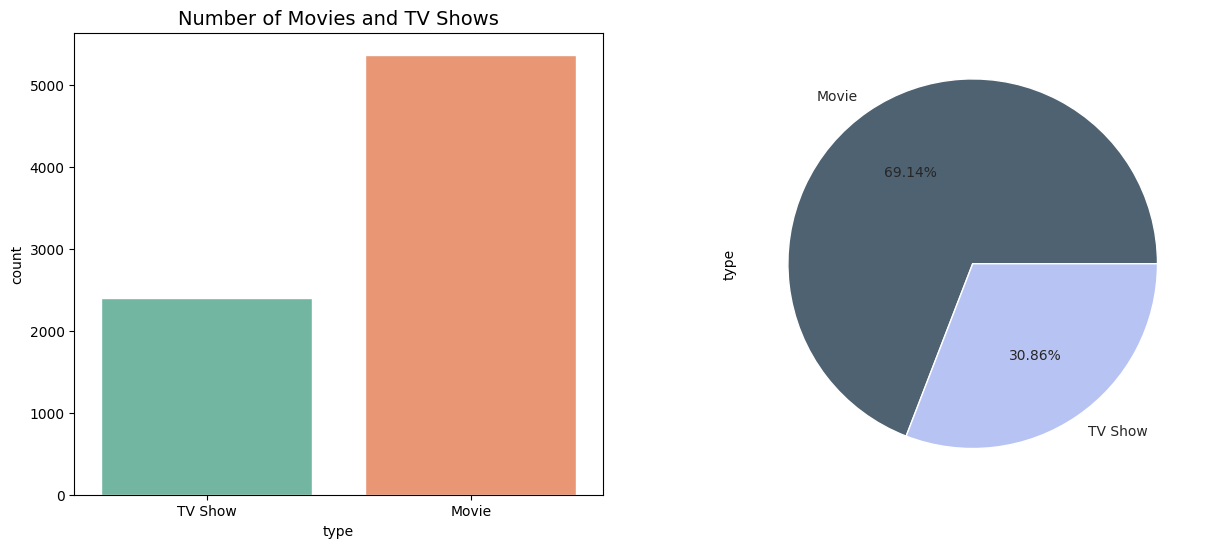

<Figure size 800x600 with 0 Axes>

In [17]:
# Chart - 1 visualization code
fig,ax = plt.subplots(1,2, figsize=(14,5))
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
count=sns.countplot(x='type', data=df, palette='Set2',ax=ax[0])
df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6),colors = ['#4F6272', '#B7C3F3'])
#labeling of values
count.set_title('Number of Movies and TV Shows', fontsize=14)
#Visualization of number of movies and tv shows
plt.show()

In [18]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

##### 1. Why did you pick the specific chart?

Count plot is a univariate plot that shows the comparison of different groups in categorical variables
countplot is a good choice for visualizing categorical data, it shows the number of movies and TV shows on Netflix.

A pie chart is a circular statistical graphic which is divided into slices to illustrate numerical proportion.


##### 2. What is/are the insight(s) found from the chart?

* The number of movies on Netflix is greater than the number of TV shows, with 5372 movies and 2398 TV shows currently available on the platform.
* 69.14% are movies and 30.86% are tv-shows.
* majority of content type in netflix dataset is movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix needs to produce or aquire rights of more tv shows because from above data we can clearly see the dominance of movies contents on the Netflix. The people who loves the web series or tv shows might tend to look out for another options and hence it may leads to decrease in number of subscriber from the Netflix.

#### Rating analysis

In [19]:
# Chart - 2 visualization code
df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7770, dtype: object

In [20]:
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].map(ratings)
     

In [21]:
# convert 'type' column to categorical data type
df['type'] = pd.Categorical(df['type'])

# create a new categorical column 'target_ages' with specified categories
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [22]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day  month  year  \
0  In a future where the elite inhabit an island ...   14      8  2020   
1  After a devastating earthquake hits Mexico Cit...   23     12  2016   
2  When an army recruit is found dead, his fellow...   20     12  2018   
3  In a postapocalyptic world, rag-doll robots hi...   16     11  2017   
4  A brilliant group of students become card-coun...    1      1  2020   

  target_ages  
0      Adults  
1      Adults  
2      Adults  
3       Teens  
4       Teens

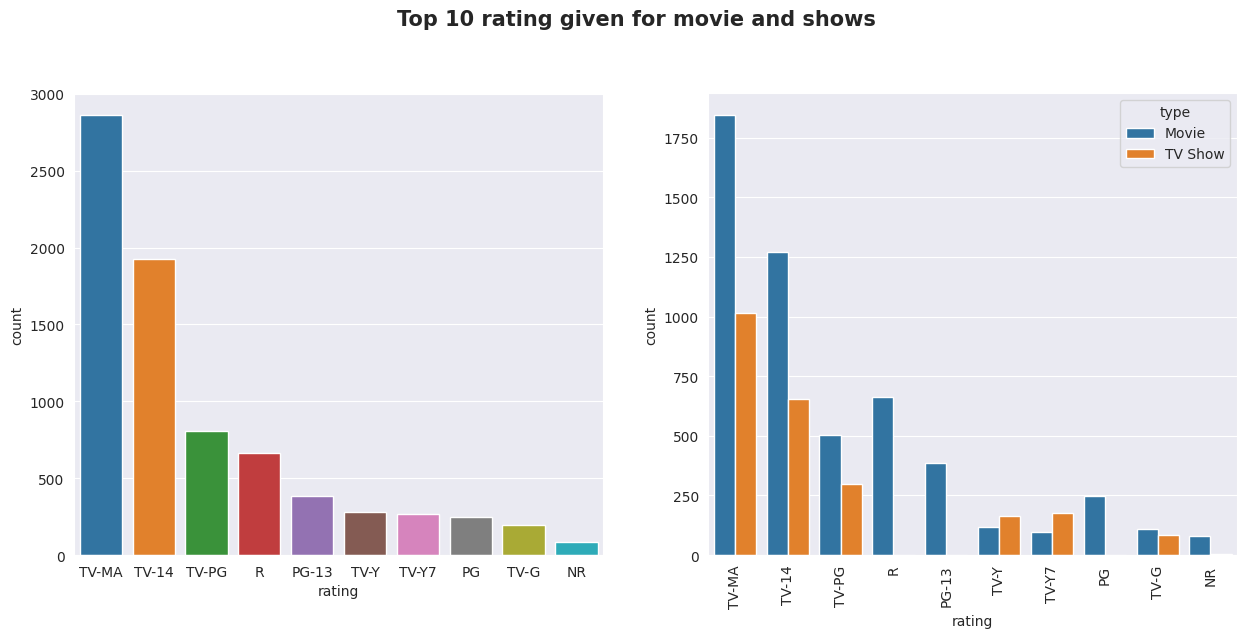

In [23]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.show()

<Axes: xlabel='target_ages', ylabel='count'>

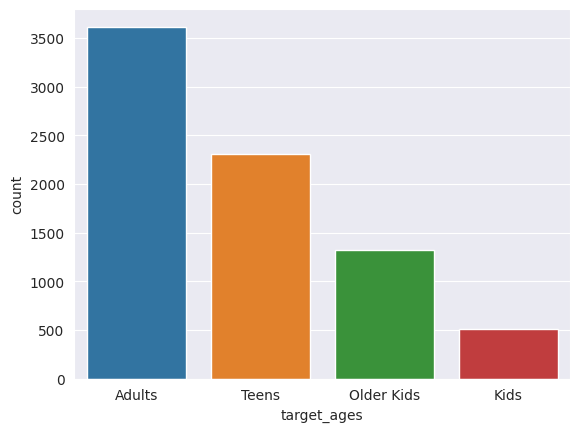

In [24]:
sns.countplot(x="target_ages", data=df, order=df['target_ages'].value_counts().index)

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.
Bar chart easily shows the count of movies belongs to  each ratings and we can also make comparison among subgroups or rating and target_ages.

##### 2. What is/are the insight(s) found from the chart?

* The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience" followed by TV-14, which stands for "Teens".
* When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.
* High numbers of movie are more suitabe for adults

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can have a positive impact on Netflix's business strategy. Knowing that TV-MA is the most common rating for both movies and TV shows, Netflix can continue to focus on producing and acquiring content that appeals to adult audiences.

Additionally, understanding the target age groups for different ratings can helps Netflix to create plans, marketing and promotional contents to specific audiences.

There is a potential negative impact as well. Some subscribers may be don't  like amount of mature content providing by the netflix, particularly if they are looking for family-friendly shows. This could lead to decreses in subscribers.

#### Release Year

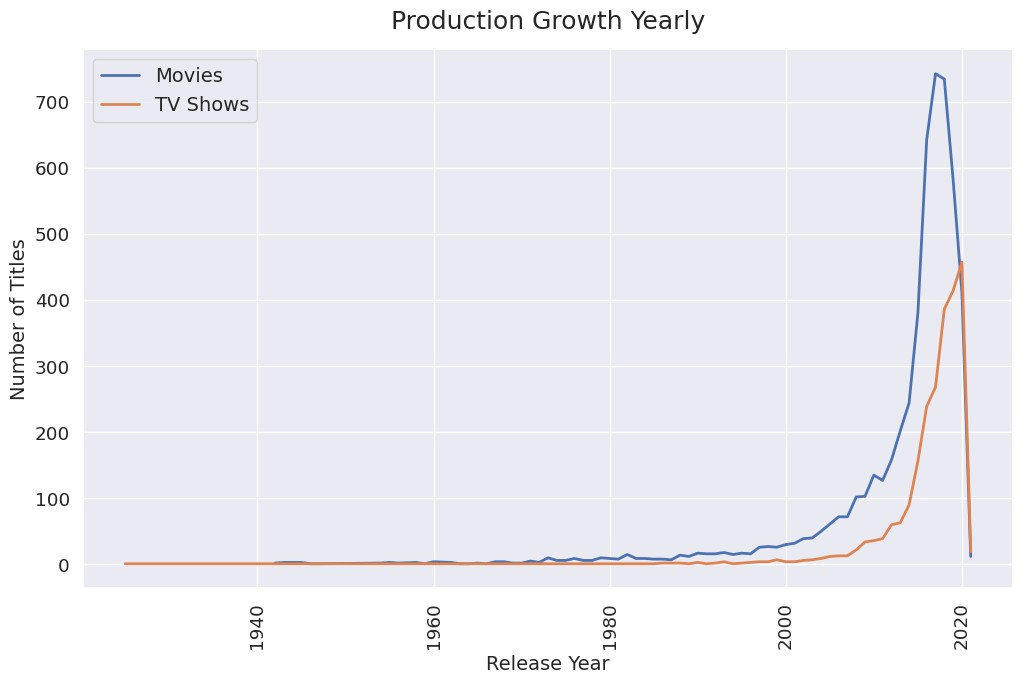

In [25]:
#Creating a line chart to visualize the number of movies and TV shows released each year
#Extracting the count of movies and TV shows for each year
movies_year = movies['release_year'].value_counts().sort_index(ascending=False)
tvshows_year = tv_shows['release_year'].value_counts().sort_index(ascending=False)

#Creating a line plot using Seaborn
sns.set(style='darkgrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 7))

ax = sns.lineplot(x=movies_year.index, y=movies_year.values, label='Movies', linewidth=2 )
ax = sns.lineplot(x=tvshows_year.index, y=tvshows_year.values, label='TV Shows', linewidth=2)

#Customizing the plot
plt.xticks(rotation=90)
ax.set_xlabel('Release Year', fontsize=14)
ax.set_ylabel('Number of Titles', fontsize=14)
ax.set_title('Production Growth Yearly', fontsize=18, pad=15)
plt.legend(fontsize=14)

plt.show()
     

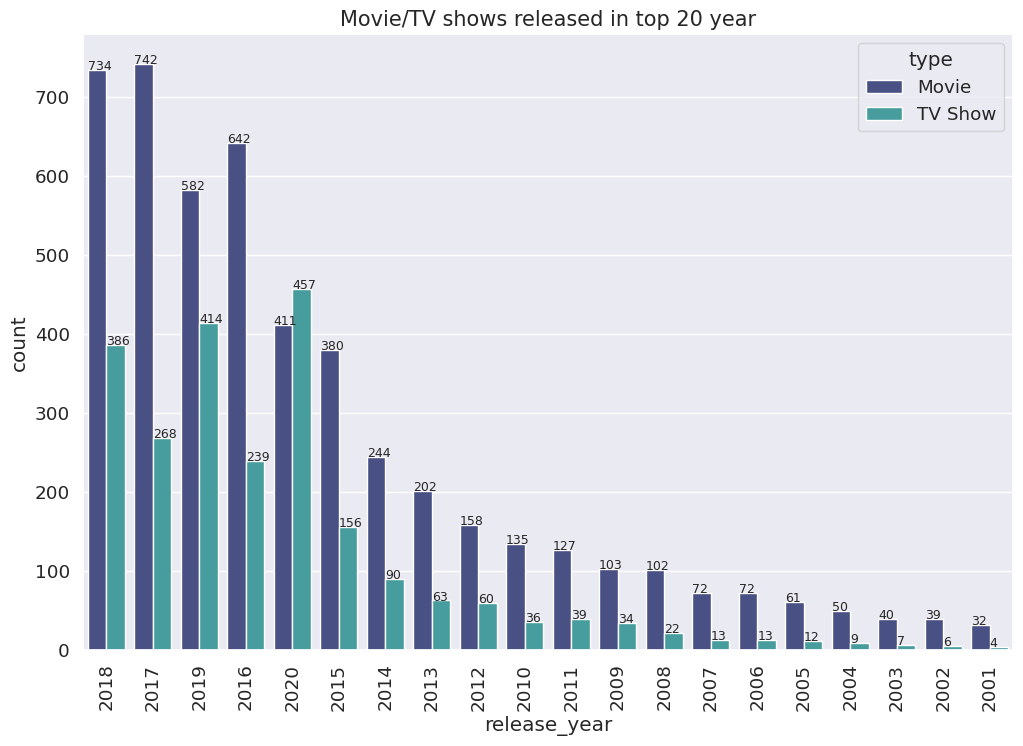

In [26]:
plt.figure(figsize=(12,8))
count = sns.countplot(x="release_year", palette='mako',hue='type', data=df, order=df['release_year'].value_counts().index[0:20])
count.set_title('Movie/TV shows released in top 20 year', size=15)
plt.xticks(rotation=90)
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()),size=9)
plt.show()

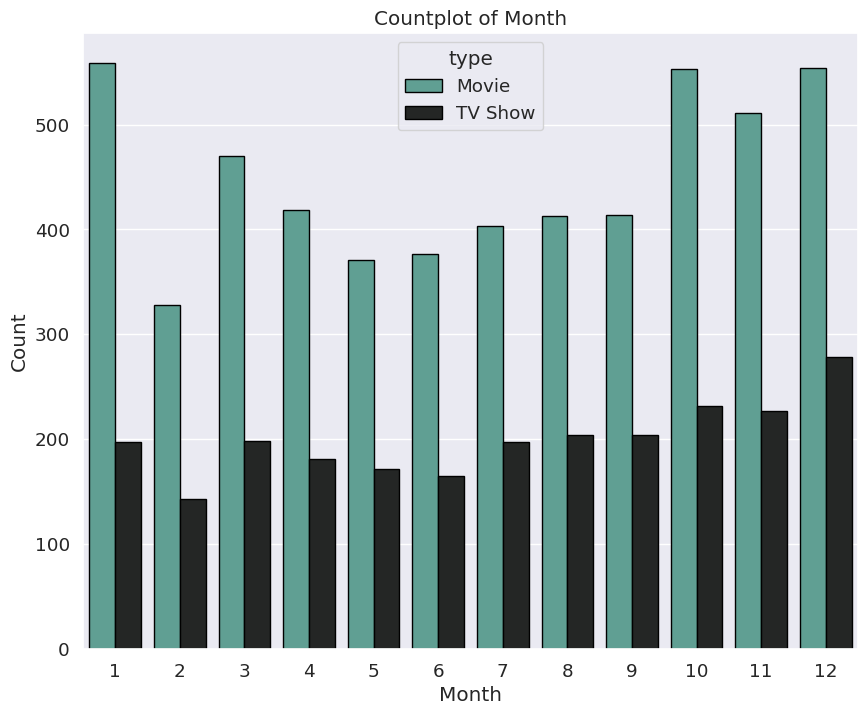

In [27]:
#visualization of month of movie release
plt.figure(figsize=(10, 8))
sns.countplot(x='month', data=df, palette="dark:#5A9_r",hue='type',edgecolor='black')
plt.title('Countplot of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I choose line plot to display the number of movies and TV shows released per year from 2001 to 2020. This will allow  a clear comparison between the number of movies and TV shows released in each year and identify any trends or patterns in the data.

Count plot is a univariate plot that shows the comparison of different groups in categorical variables countplot is a good choice for visualizing categorical data.

##### 2. What is/are the insight(s) found from the chart?

* The years 2017 and 2018 had the highest number of movie releases, while 2020 had the highest number of TV show releases.
* The growth rate of movie releases on Netflix is significantly faster than that of TV shows.
* Since 2015, there has been a substantial increase in the number of movies and TV show episodes available on Netflix.
* It appears that Netflix has given more attention to increasing its movie content rather than TV shows, as the growth rate of movies has been much more significant than that of TV shows.
* Netflix adds the highest number of movies and TV shows during the period between October and January.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In recent years the amount of contents on the Netflix increasing rapidly.But more of the growth is in "Movies". 
This improvements are good for movie lovers and it can create a postive impact in a business.

On the other hand the Netflix needs to produce or aquire rights of more tv shows because from above data we can clearly see the dominance of movies contents on the Netflix. The people who loves the web series or tv shows might tend to look out for another options and hence it may leads to decrease in number of subscriber from the Netflix.

#### Genres

In [28]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

genre  count
0    International Movies   2437
1                  Dramas   2105
2                Comedies   1471
3  International TV Shows   1197
4           Documentaries    786

In [29]:
genres.value_counts()

genre                         count
Action & Adventure            721      1
Stand-Up Comedy & Talk Shows  52       1
Reality TV                    222      1
Romantic Movies               531      1
Romantic TV Shows             333      1
Sci-Fi & Fantasy              218      1
Science & Nature TV           85       1
Spanish-Language TV Shows     146      1
Sports Movies                 196      1
Stand-Up Comedy               329      1
TV Action & Adventure         149      1
Anime Features                57       1
TV Comedies                   517      1
TV Dramas                     703      1
TV Horror                     69       1
TV Mysteries                  90       1
TV Sci-Fi & Fantasy           75       1
TV Shows                      12       1
TV Thrillers                  50       1
Teen TV Shows                 60       1
Music & Musicals              321      1
Movies                        52       1
LGBTQ Movies                  90       1
Korean TV Shows      

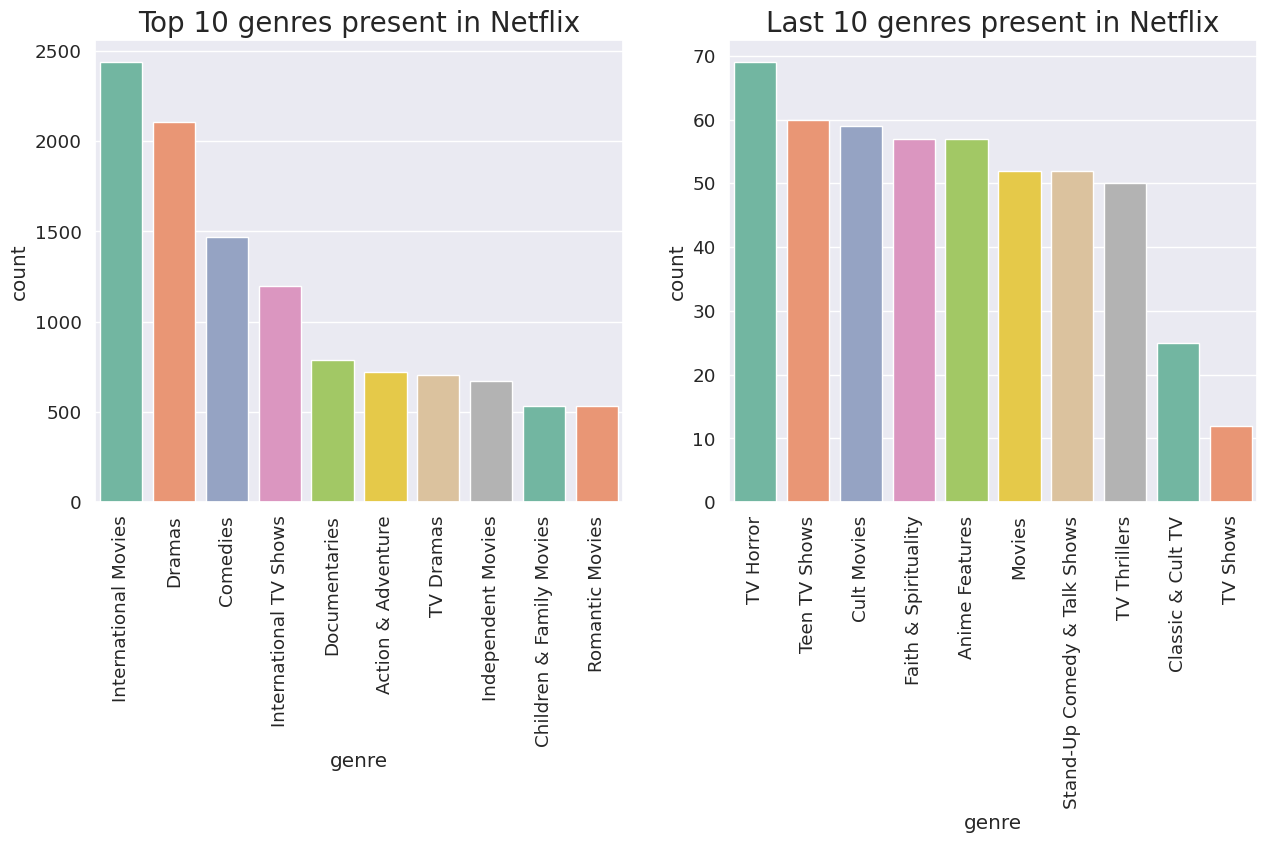

In [30]:
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Top 10 genres
top = sns.barplot(x='genre', y = 'count',palette='Set2', data=genres[:10], ax=ax[0])
top.set_title('Top 10 genres present in Netflix', size=20)
plt.setp(top.get_xticklabels(), rotation=90)

# Last 10 genres
bottom = sns.barplot(x='genre', y = 'count',palette='Set2', data=genres[-10:], ax=ax[1])
bottom.set_title('Last 10 genres present in Netflix', size=20)
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

* International Movies, Dramas, and Comedies make up the majority of the genres.
* TV Shows, Classic and cult TV, TV thrillers, Stand-Up comedy, and Talk shows account for the least genres.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this information could definitely have a positive business impact. By knowing which genres are most popular, Netflix can tailor their content offerings and marketing strategies to appeal to their target audience.



#### Movie Duration

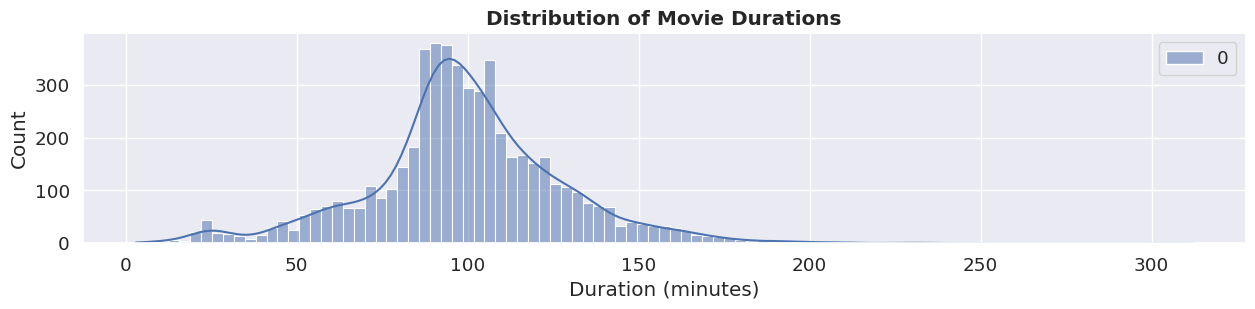

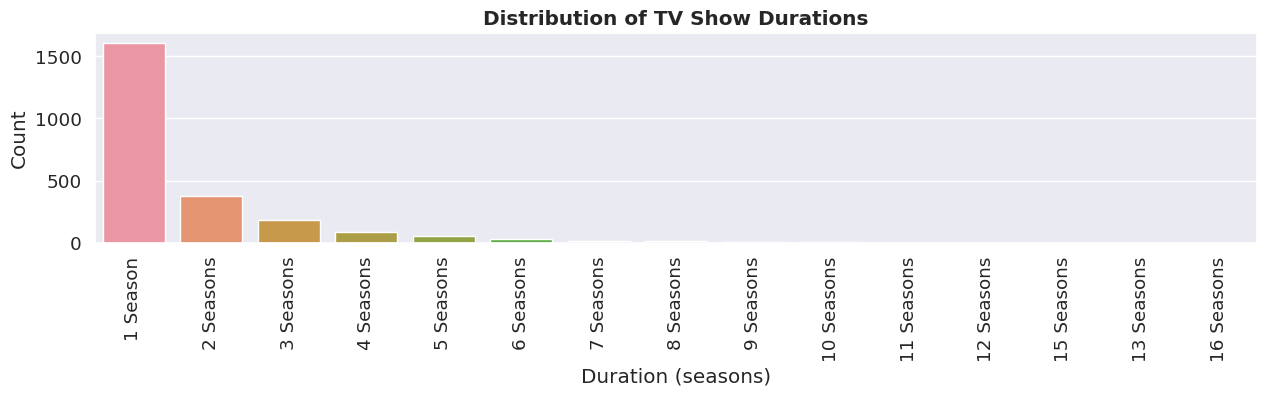

In [31]:
# Create a figure and set its size
plt.figure(figsize=(15, 6))
plt.subplot(2,1,2)
# Extract the duration values as integers using regex and plot a histogram
sns.histplot(movies['duration'].str.extract('(\d+)').astype(int), kde=True)
# Set the title of the plot
plt.title('Distribution of Movie Durations', fontweight='bold')
# Set the x-axis and y-axis label
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')

plt.figure(figsize=(15, 6))
plt.subplot(2,1,2)
# Create a count plot of TV show durations
sns.countplot(x=tv_shows['duration'], data=tv_shows, order=tv_shows['duration'].value_counts().index)
# Set the title of the plot
plt.title("Distribution of TV Show Durations", fontweight='bold')
# Set the x-axis and y-axis label
plt.xlabel("Duration (seasons)")
plt.ylabel("Count")
plt.xticks(rotation=90)



plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a graphical representation of data points organized into user-specified ranges. Similar in appearance to a bar graph, the histogram condenses a data series into an easily interpreted visual by taking many data points and grouping them into logical ranges or bins.

Count plot is a univariate plot that shows the comparison of different groups in categorical variables countplot is a good choice for visualizing categorical data.



##### 2. What is/are the insight(s) found from the chart?

* From the histogram plot of the movie durations, it was observed that the majority of the movies have a duration between 50 to 150 minutes.
* the TV shows have a large number of single-season shows, which indicates that most of the TV shows on Netflix are relatively new.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Above graphs just shows the disturbution plots for movies and seasons in our dataset.

#### Countires and their contents

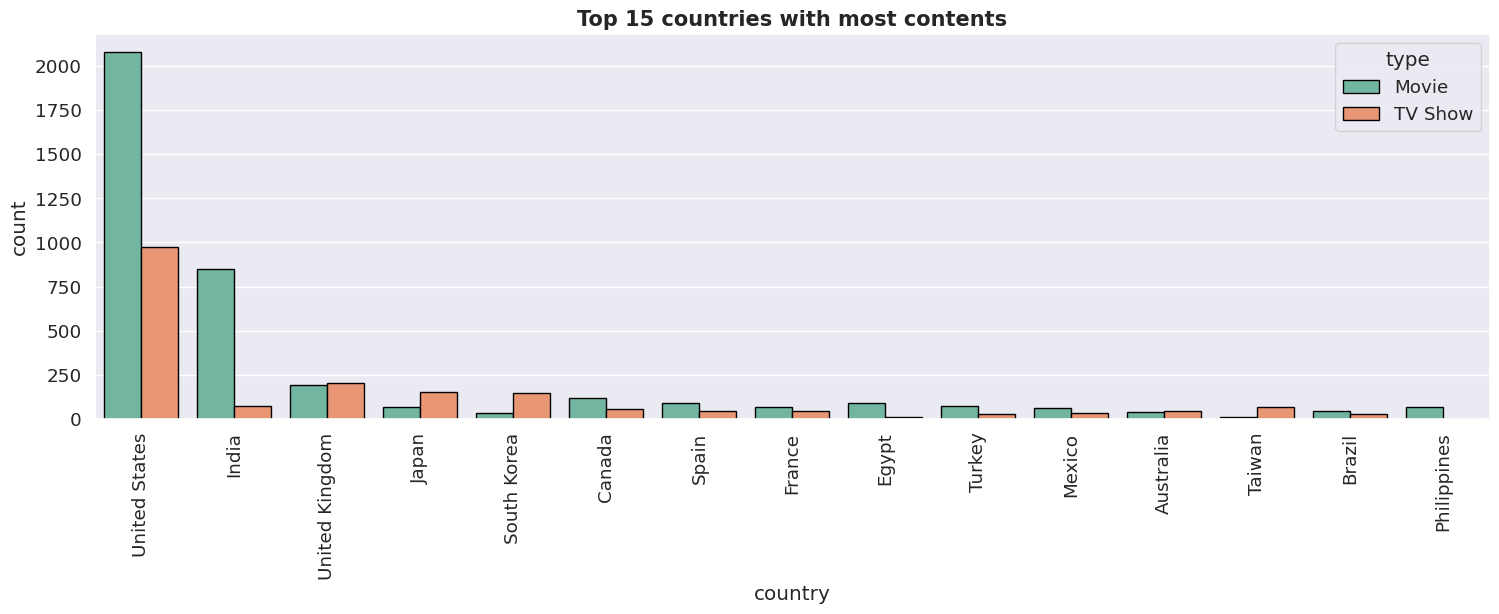

In [32]:
# create a figure with the desired size
plt.figure(figsize=(18,5))

# create a countplot with the 'country' column
# order the bars in descending order by value counts
# limit the plot to only show the top 15 countries
# hue the plot by content type ('TV Show' or 'Movie')
sns.countplot(x=df['country'], order=df['country'].value_counts().index[0:15], hue=df['type'],palette='Set2',edgecolor='black')

# rotate the x-axis tick labels by 50 degrees for better visibility
plt.xticks(rotation=90)

# set the plot title and font size
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')

# show the plot
plt.show()

In [33]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description', 'day',
       'month', 'year', 'target_ages'],
      dtype='object')

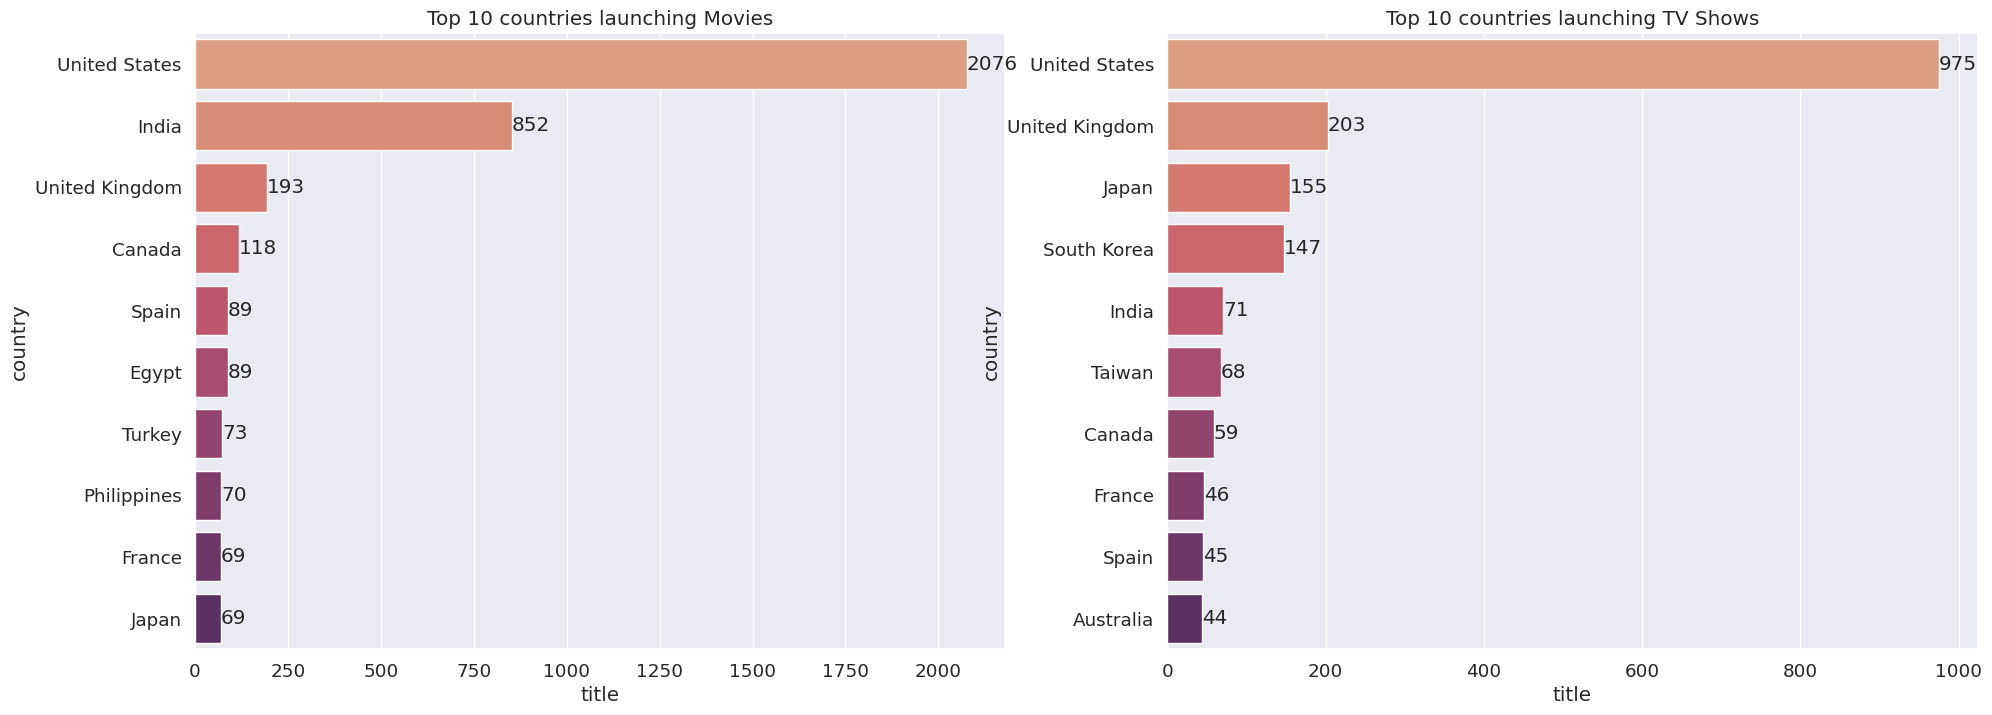

In [34]:
plt.figure(figsize=(23,8))
for i,j,k in ((movies, 'Movies',0),(tv_shows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_country = i.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
  plots= sns.barplot(y = "country",x = 'title', data = df_country, palette="flare")
  plt.title(f'Top 10 countries launching {j}')
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

Count plot is a univariate plot that shows the comparison of different groups in categorical variables countplot is a good choice for visualizing categorical data.

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

##### 2. What is/are the insight(s) found from the chart?

* United States and India has most of contents on the Netflix.
* US and india release most of movies on Netflix.
* US and United Kingdom are the one who launched most number of TV shows.
* South Korea and Japan are the countries who launched more number of TV shows in comparison to movies launched by them.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can be useful for Netflix in a number of ways. For example, they could use this information for their content recommendations to users based on their geographic location. They could also use this information to determine which types of content to focus on producing in the future.

However Netflix should focus on region or countries which are lacking contents. It may leads to decrease in number of local subscriber who wants to watch local contents.

#### Chart - 14 - Correlation Heatmap

In [35]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description', 'day',
       'month', 'year', 'target_ages'],
      dtype='object')

In [36]:
# Correlation Heatmap visualization code
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country        Canada     Egypt    France     India     Japan  Mexico  \
target_ages                                                             
Kids         0.180791  0.000000  0.095652  0.016251  0.008929    0.02   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.272321    0.07   
Teens        0.146893  0.683168  0.165217  0.567714  0.352679    0.14   
Adults       0.446328  0.277228  0.678261  0.255688  0.366071    0.77   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Kids            0.027322  0.022388        0.093434       0.089479  
Older Kids      0.120219  0.044776        0.204545       0.195346  
Teens           0.382514  0.097015        0.189394       0.243199  
Adults          0.469945  0.835821        0.512626       0.471976

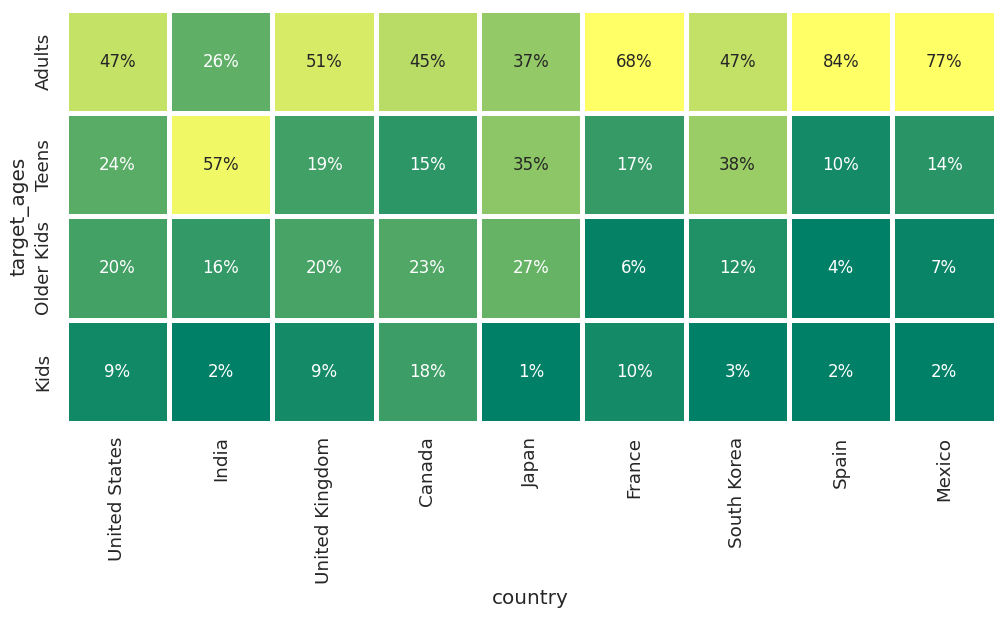

In [37]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="summer",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us which countries producing which type of content the most.

##### 2. What is/are the insight(s) found from the chart?

* We found that most of the countries produces content related to Adult and Teen.
* Amomg all the countries INDIA has less content in kids segment
* 84% of content is Adult content from spain.
* Canada produces more content related to kids content.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

US produced equal amount of movies as India.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis (H0)**: The average number of movies on Netflix in the United States is equal to the average number of movies on Netflix in India.
* **Alternative hypothesis (H1)**: The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
# Filter movies only

movies = df[df.type == 'Movie']

# Filter by country
us_movies = movies[movies.country == 'United States']
india_movies = movies[movies.country == 'India']

# Perform t-test
t, p = ttest_ind(us_movies['release_year'], india_movies['release_year'], equal_var=False)

# Print the results
print('p-value: ', p)
alpha = 0.05
if p < alpha:
    print("Reject null hypothesis. The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India.")
else:
    print("Fail to reject null hypothesis. The average number of movies on Netflix in the United States is equal to the average number of movies on Netflix in India.")

p-value:  0.0002764286534204901
Reject null hypothesis. The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India.


##### Which statistical test have you done to obtain P-Value?

I used a two-sample t-test to obtain the p-value. Specifically, I used the ttest_ind function from the scipy.stats module to perform the t-test.

##### Why did you choose the specific statistical test?

I chose the two-sample t-test because it's appropriate for comparing the means of two independent samples.We have two independent samples of movies on Netflix in the United States and India, and we want to test whether the mean number of movies in the United States is significantly different from the mean number of movies in India.

### Hypothetical Statement - 2

The average duration of movies added in the year 2020 on Netflix is simillar of movies added in the year 2021.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null Hypothesis(H0)**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2018.

* **Alternative Hypothesis(H1)**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2018.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value
# To test this hypothesis, we perform a two-sample t-test.
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2018
movies_2020 = df[(df['type'] == 'Movie') & (df['release_year'] == 2020)]
movies_2018 = df[(df['type'] == 'Movie') & (df['release_year'] == 2018)]

# Perform two-sample t-test
t, p = ttest_ind(movies_2020.count(), 
                 movies_2018.count(), equal_var=False)
print('p-value: ', p)

# Print the results
if p < 0.05:
    print('Reject null hypothesis. \nThe average duration of Movies added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2018.')
else:
    print('Failed to reject null hypothesis. \nThe average duration of Moviess added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2018.')


p-value:  0.0
Reject null hypothesis. 
The average duration of Movies added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2018.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the P-Value is a two-sample t-test.

##### Why did you choose the specific statistical test?

The two-sample t-test was chosen because we are comparing the means of two different samples (movies added in 2020 vs movies added in 2018) to determine whether they are significantly different. Additionally, we assume that the two samples have unequal variances since it is unlikely that the duration of movies added in 2020 and 2018 would have the exact same variance.

### Hypothetical Statement - 3

The number of movies and TV shows on Netflix are simillar.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis(H0)**: The number of movies and TV shows on Netflix is not significantly different.

* **Alternative hypothesis(H1)**: The number of movies on Netflix is significantly greater than the number of TV shows.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value

# Count the number of movies and TV shows
from statsmodels.stats.proportion import proportions_ztest
n_movies = df[df['type'] == 'Movie'].count()['type']
n_tv_shows = df[df['type'] == 'TV Show'].count()['type']

# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]
nobs = [len(df), len(df)]

# Perform the z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Number of movies:', n_movies)
print('Number of TV shows:', n_tv_shows)
print('z-statistic:', z_stat)
print('p-value:', p_val)

if p < 0.05:
    print('Reject null hypothesis. \nThe number of movies on Netflix is significantly greater than the number of TV shows.')
else:
    print('Failed to reject null hypothesis. \nThe number of movies and TV shows on Netflix is not significantly different.')

Number of movies: 5372
Number of TV shows: 2398
z-statistic: 47.71395895355864
p-value: 0.0
Reject null hypothesis. 
The number of movies on Netflix is significantly greater than the number of TV shows.


##### Which statistical test have you done to obtain P-Value?

I used a two-sample z-test for proportions to obtain the p-value.

##### Why did you choose the specific statistical test?

I chose the two-sample z-test for proportions to compare the number of movies and TV shows on Netflix because the data consists of two categorical variables (movie or TV show), and we want to test if there is a significant difference between the proportions of these categories in the population. The two-sample z-test for proportions is an appropriate test to use when we have two independent samples.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [41]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
day             0
month           0
year            0
target_ages     0
count           0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no missing data in dataset, we already deal with missing data in data wrangling section.

### 2. Handling Outliers

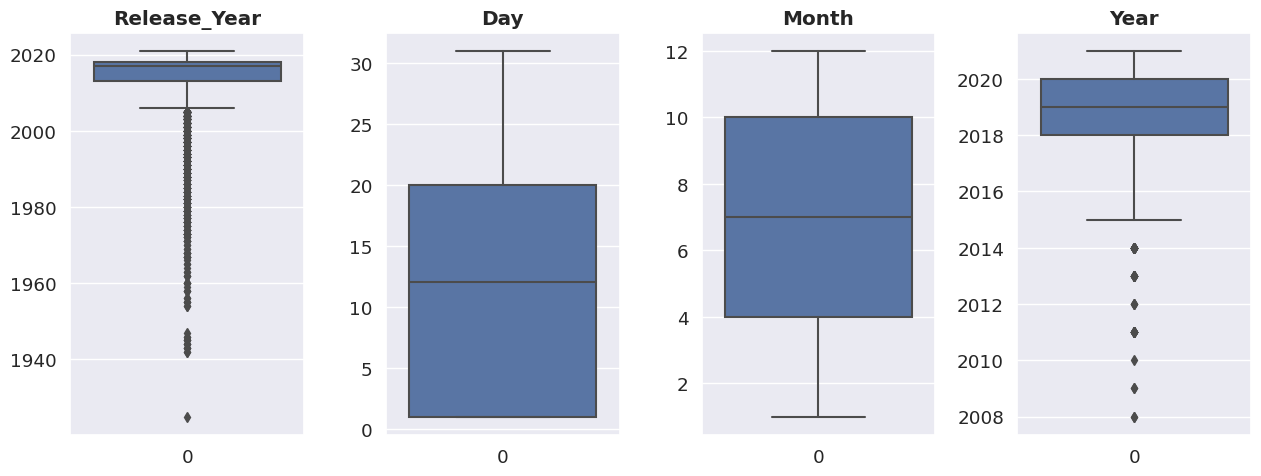

In [42]:
# Handling Outliers & Outlier treatments
# Storing the continous value feature in a separate list
num_feature= ["release_year","day","month","year"]

# checking outliers with the help of box plot for continous features
plt.figure(figsize=(16,5))
for n,column in enumerate(num_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Although we have some of the anomalies in continous feature but we will not treat by considering outliers as some of the Movies/TV Shows has released or added early on Netflix.

The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

### 3. Categorical Encoding

No need of encoding

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [43]:
df_new=df.copy()

In [44]:
df_new.shape

(7770, 17)

#### 1. Expand Contraction

In [45]:
# Expand Contraction
df_new['detail'] = df_new['description'] + df_new['listed_in'] + df_new['rating'] + df_new['cast'] + df_new['country'] + df_new['director']

In [46]:
df_new.detail[1]

'After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.Dramas, International MoviesTV-MADemián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen BeatoMexicoJorge Michel Grau'

#### 2. Lower Casing

In [47]:
# Lower Casing
# Lower Casing
df_new['detail']= df_new['detail'].str.lower()

# Checking the manipulation
df_new.iloc[1]['detail']

'after a devastating earthquake hits mexico city, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.dramas, international moviestv-mademián bichir, héctor bonilla, oscar serrano, azalia ortiz, octavio michel, carmen beatomexicojorge michel grau'

#### 3. Removing Punctuations

In [48]:
# Remove Punctuations
# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [49]:
df_new['detail']= df_new['detail'].apply(remove_punctuations)

# Checking the manipulation
df_new.iloc[1]['detail']

'after a devastating earthquake hits mexico city trapped survivors from all walks of life wait to be rescued while trying desperately to stay alivedramas international moviestvmademián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beatomexicojorge michel grau'

#### 4. Removing URLs & Removing words and digits contain digits.

In [50]:
# Remove URLs & Remove words and digits contain digits
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [51]:
df_new['detail']= df_new['detail'].apply(remove_url_and_numbers)

# Checking the manipulation
df_new.iloc[1]['detail']

'after a devastating earthquake hits mexico city trapped survivors from all walks of life wait to be rescued while trying desperately to stay alivedramas international moviestvmademi n bichir h ctor bonilla oscar serrano azalia ortiz octavio michel carmen beatomexicojorge michel grau'

#### 5. Removing Stopwords & Removing White spaces

In [52]:
# Remove Stopwords
# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [53]:
import re
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)
    
    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [54]:
df_new['detail']= df_new['detail'].apply(remove_stopwords_and_whitespaces)

# Checking the manipulation
df_new.iloc[1]['detail']

'devastating earthquake hits mexico city trapped survivors walks life wait rescued trying desperately stay alivedramas international moviestvmademi n bichir h ctor bonilla oscar serrano azalia ortiz octavio michel carmen beatomexicojorge michel grau'

#### 6. Tokenization

In [55]:
# Tokenization
# Downloading needed libraries
nltk.download('punkt')

# Tokenization
df_new['detail']= df_new['detail'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
df_new.iloc[1]['detail']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['devastating',
 'earthquake',
 'hits',
 'mexico',
 'city',
 'trapped',
 'survivors',
 'walks',
 'life',
 'wait',
 'rescued',
 'trying',
 'desperately',
 'stay',
 'alivedramas',
 'international',
 'moviestvmademi',
 'n',
 'bichir',
 'h',
 'ctor',
 'bonilla',
 'oscar',
 'serrano',
 'azalia',
 'ortiz',
 'octavio',
 'michel',
 'carmen',
 'beatomexicojorge',
 'michel',
 'grau']

#### 8. Text Normalization

In [56]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [57]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [58]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
df_new['detail']= df_new['detail'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
df_new.iloc[1,]['detail']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


'devastating earthquake hit mexico city trapped survivor walk life wait rescued trying desperately stay alivedramas international moviestvmademi n bichir h ctor bonilla oscar serrano azalia ortiz octavio michel carmen beatomexicojorge michel grau'

##### Which text normalization technique have you used and why?

We have used Lemmatization instead of Stemming for our project because Lemmatization produces a more accurate base word,Unlike Stemming, which simply removes the suffix from a word. Lemmatization can handle various inflections of a word, including plural forms, verb tenses, and comparative forms, making it useful for natural language processing.

Lemmatization improves text understanding and support multiple languages.

#### 9. Part of speech tagging

In [59]:
# POS Taging
df_new['pos_tags'] = df_new['detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

In [60]:
df_new.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day  month  year  \
0  In a future where the elite inhabit an island ...   14      8  2020   
1  After a devastating earthquake hits Mexico Cit...   23     12  2016   
2  When an army recruit is found dead, his fellow...   20     12  2018   
3  In a postapocalyptic world, rag-doll robots hi...   16     11  2017   
4  A brilliant group of students become card-coun...    1      1  2020   

  target_ages  count                                             detail  \
0      Adults      1  future elite inhabit island paradise far crowd...   
1      Adults      1  devastating earthquake hit mexico city trapped...   
2      Adults      1  army recruit found dead fellow soldier forced ...   
3       Teens      1  postapocalyptic world ragdoll robot hide fear ...   
4       Teens      1  brilliant group student become cardcounting ex...   

                                            pos_tags  
0  [(future, JJ), (elite, JJ), (inhabit, NN), (is...  
1  [(devastating, VBG), (earthquake, NN), (hit, V...  
2  [(army, NN), (recruit, NN), (found, VBN), (dea...  
3  [(postapocalyptic, JJ), (world, NN), (ragdoll,...  
4  [(brilliant, JJ), (group, NN), (student, NN), ...

#### 10. Text Vectorization

In [61]:
# Vectorizing Text
# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=10000)

In [62]:
# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(df_new['detail'])

# Checking shape of the formed document matrix
print(x.shape)

(7770, 10000)


##### Which text vectorization technique have you used and why?

We have used TFIDF vectorization in place of BAG OF WORDS because Tf-idf vectorization takes into account the importance of each word in a document. TF-IDF also assigns higher values to rare words that are unique to a particular document, making them more important in the representation.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In textual data processing, there are 10,000 arrtibutes are created in text vectorization and this huge amount of columns cannot be dealed with our local machines. So, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.

In [64]:
# Dimensionality Reduction
# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")
     

Explained variance: [1.07744223e-02 3.62365185e-03 3.15185570e-03 ... 7.12308738e-35
 6.39584594e-35 6.26790824e-35]


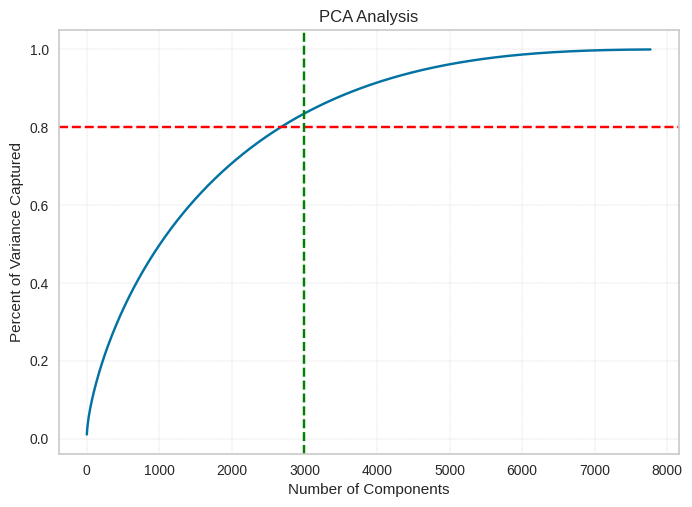

In [65]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

It is clear from the above plot that 7770 principal components can capture the 100% of variance. For our case we will consider only those number of PC's that can capture 95% of variance.

In [66]:
## Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

(7770, 4688)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data sets while retaining most of the information in the original data.

PCA works by finding the principal components of the data, which are linear combinations of the original features that capture the maximum amount of variation in the data. By projecting the data onto these principal components, PCA can reduce the number of dimensions while retaining most of the information in the original data.

PCA is a popular choice for dimensionality reduction because it is simple to implement, computationally efficient, and widely available in most data analysis software packages. Additionally, PCA has been extensively studied and has a strong theoretical foundation, making it a reliable and well-understood method.

## ***7. ML Model Implementation***

### ML Model - K-Means Clustering

Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data.A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:
The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
* Each point is closer to its own cluster center than to other cluster centers.
* Those two assumptions are the basis of the k-means model.

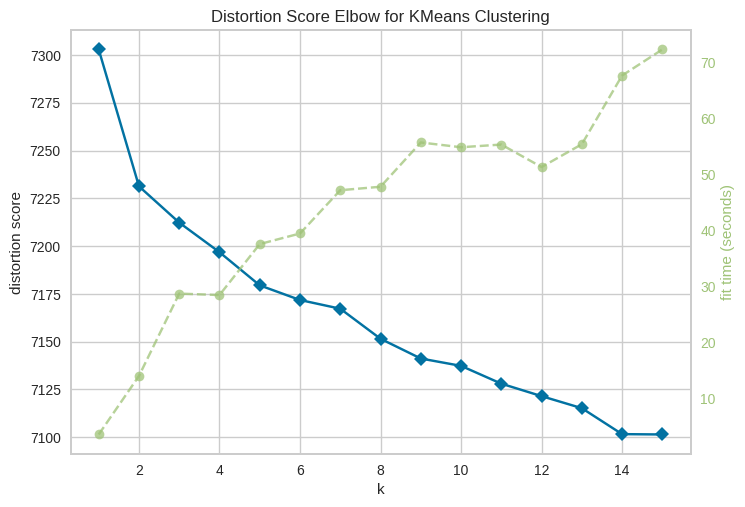

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,16),locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show() 

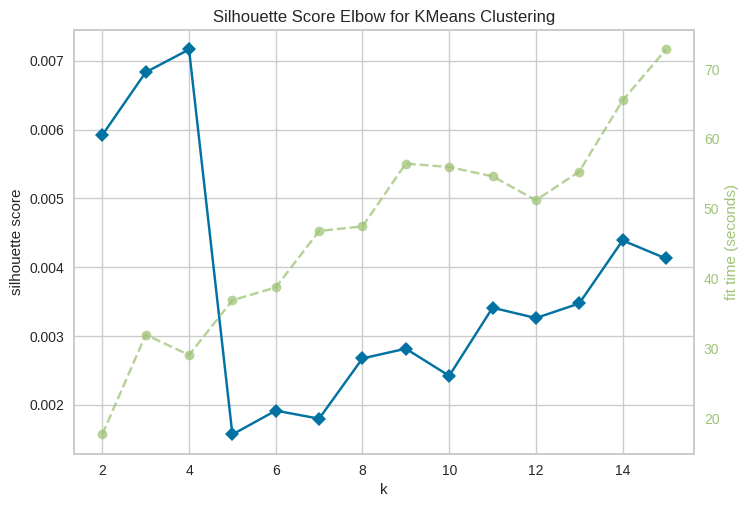

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [68]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()   

In [69]:
# Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.006096
k=3, Silhouette score=0.006763
k=4, Silhouette score=0.007008
k=5, Silhouette score=0.005540
k=6, Silhouette score=0.007030


From the above plots (Elbow plot and Sillhouette plot) it is very clear that the Silhoutte score is comparatively good for 4 number of clusters, so we will consider 4 cluster in kmeans analysis.

The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for K.  If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.


Now let's plot and see how our data points look like after assigning to their respective clusters.

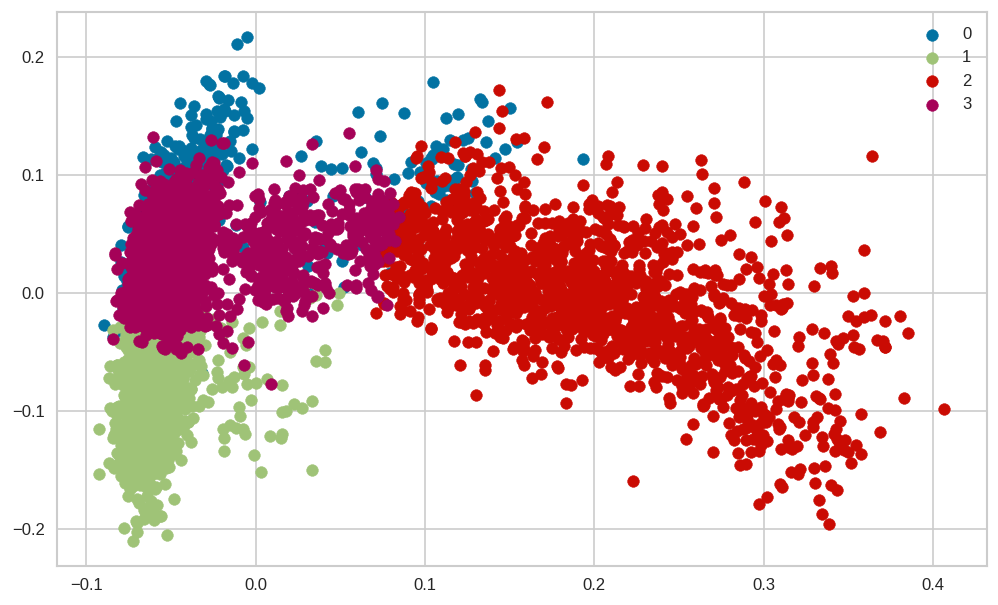

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)  

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Add cluster values to the dateframe.
df_new['kmeans_cluster'] = kmeans.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''
    
    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS
    
    # Filter the data by the specified cluster number and column name
    df_wordcloud = df_new[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0] 
    
    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])
    
    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)
    
    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()
    
    # Return the numpy array
    return image_array
     

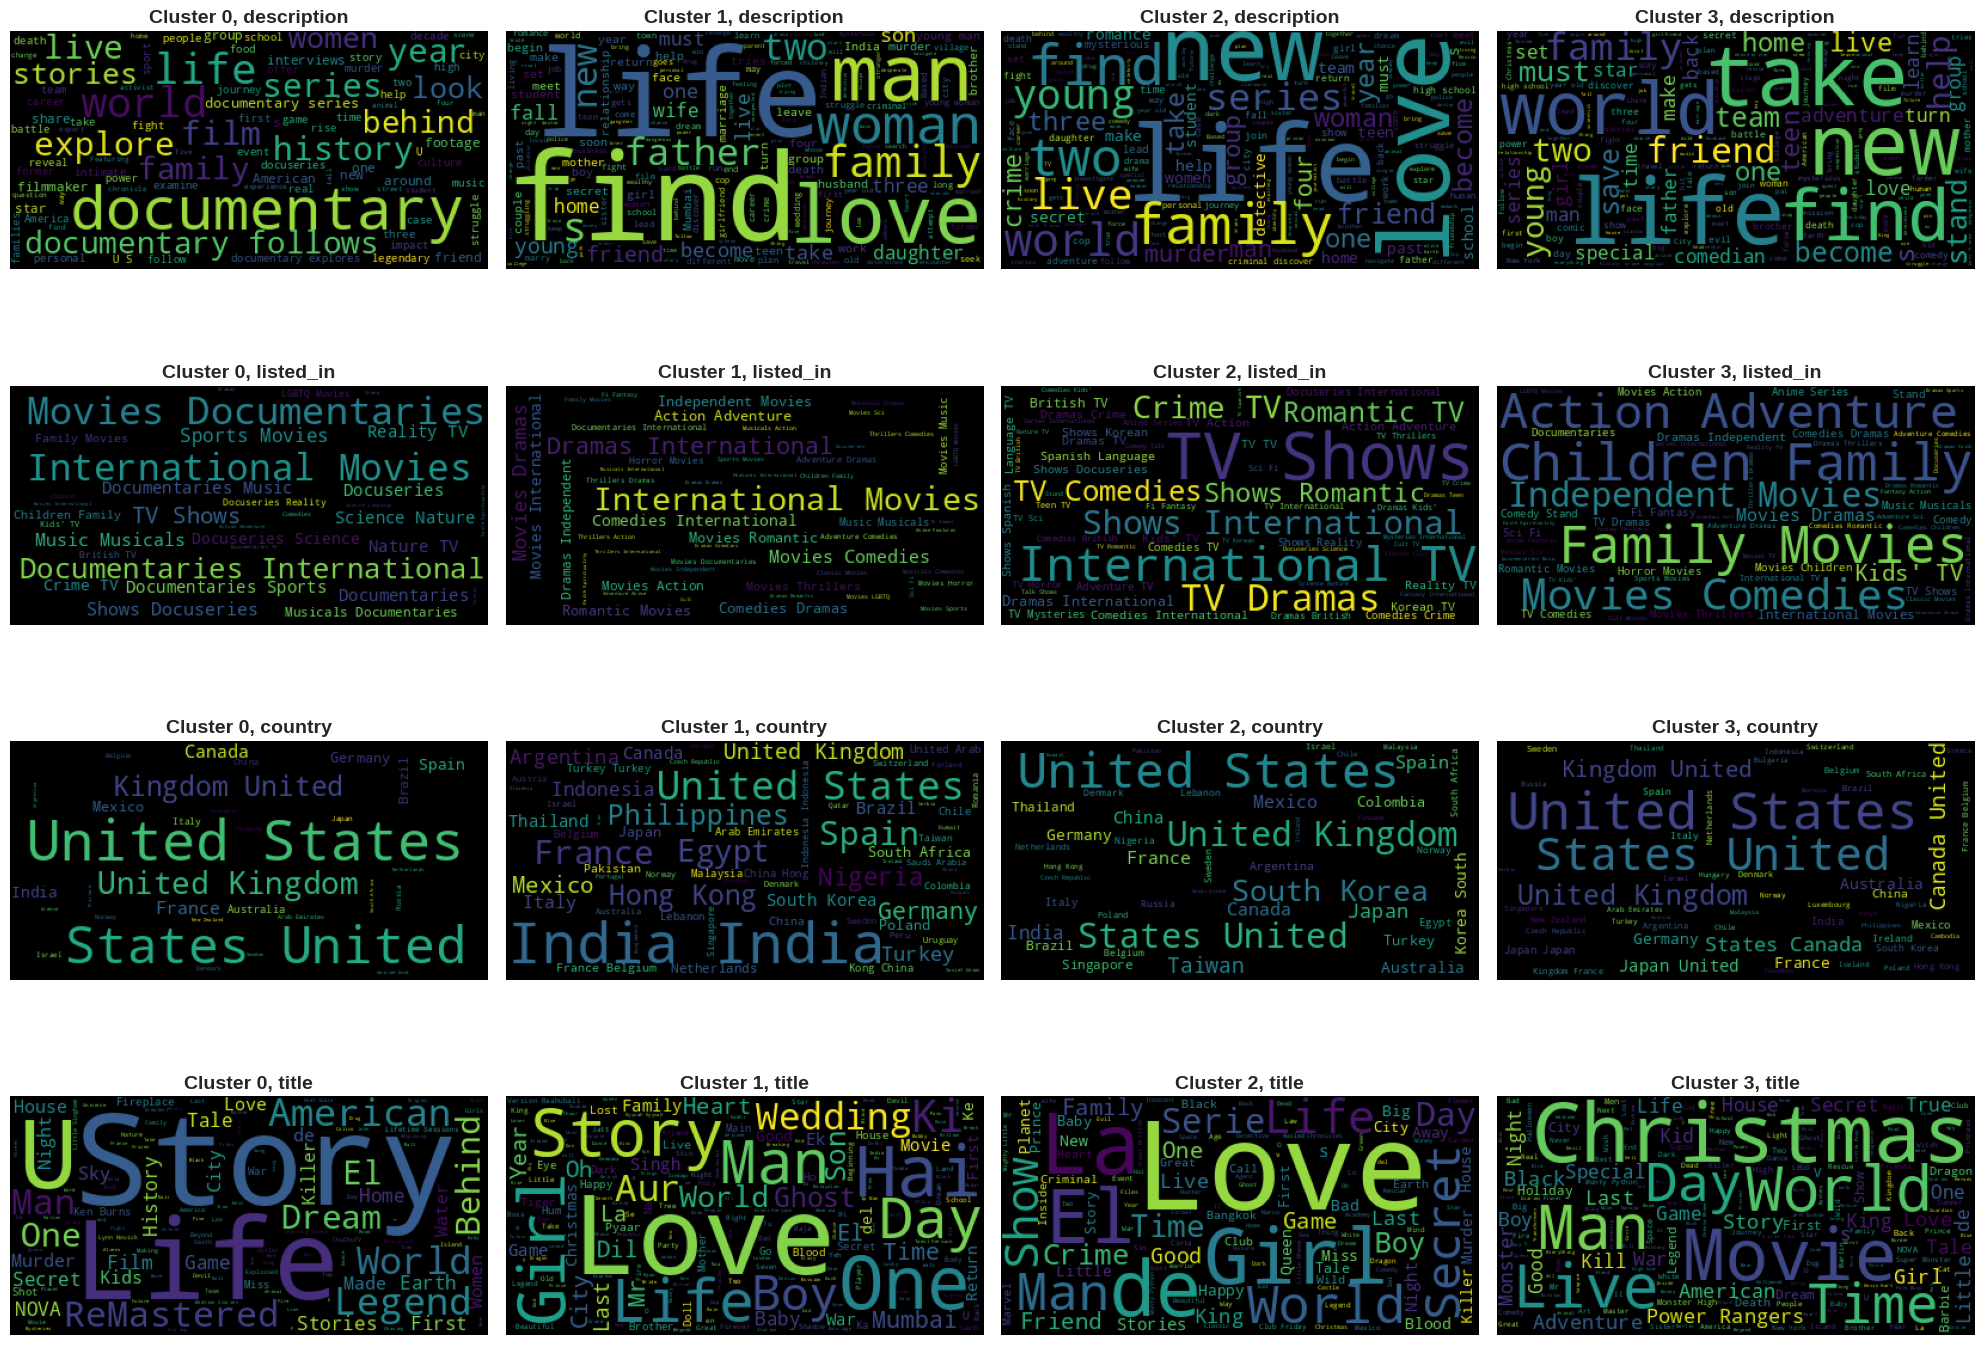

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(4):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')    
plt.tight_layout()
plt.show()

### ML Model - 2-(Hierarchial Clustering)

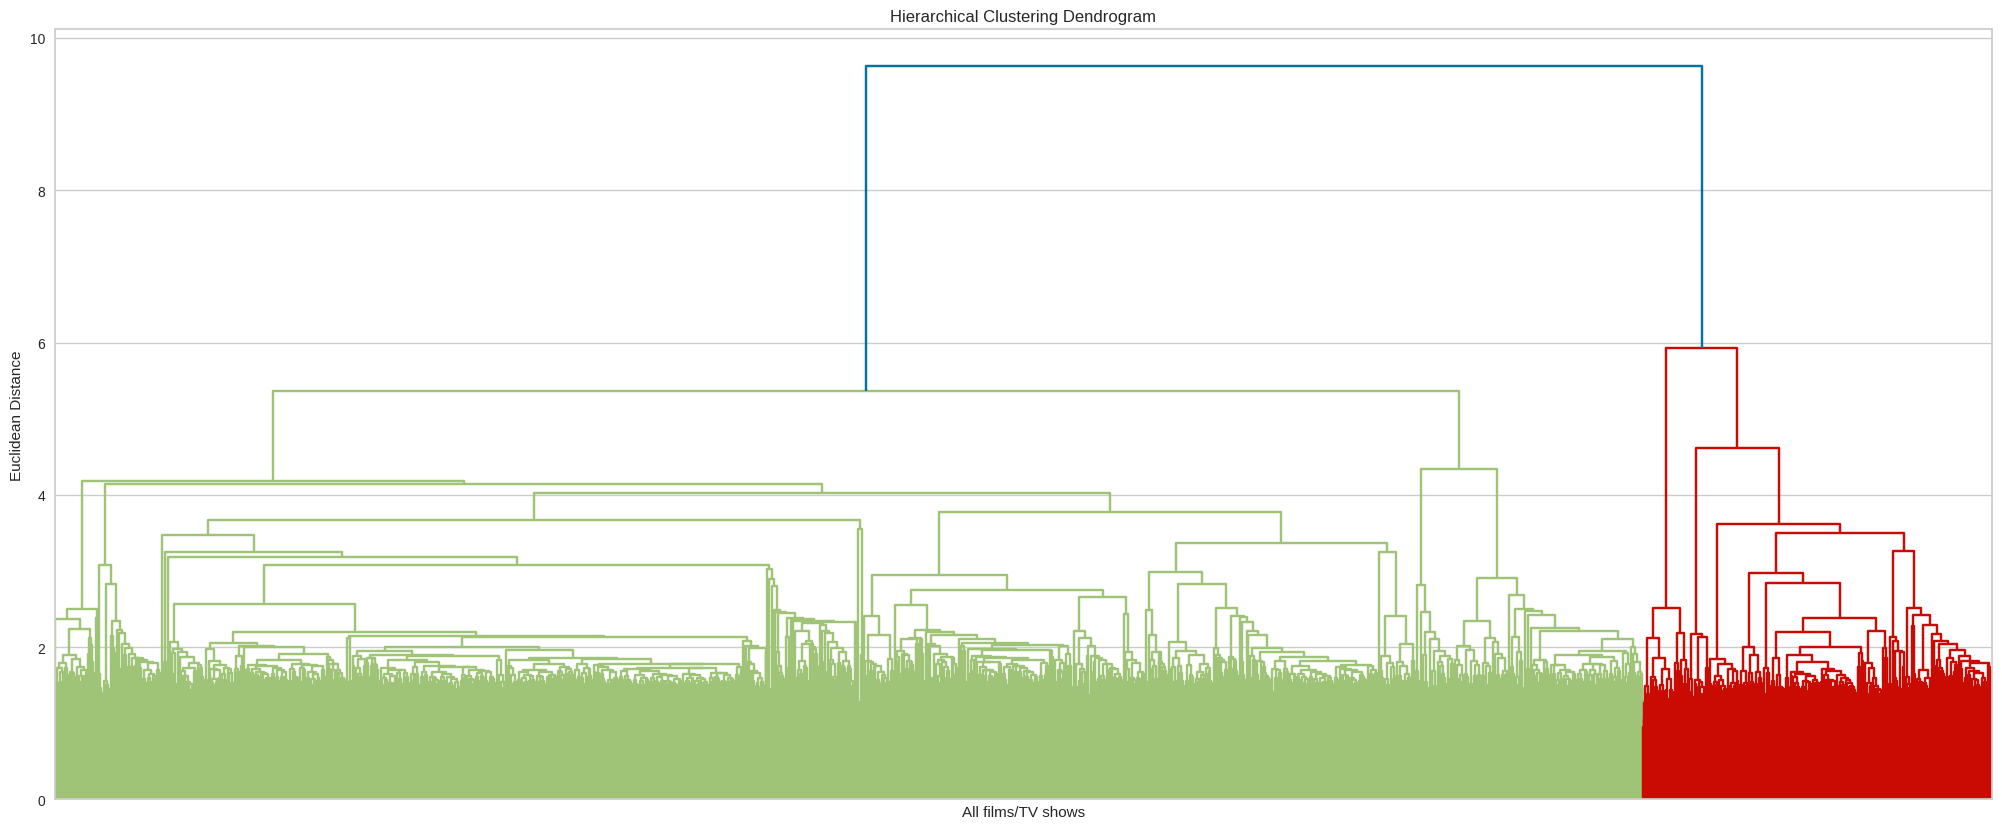

In [ ]:
#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()

* A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

* From the above Dendogram we can say that optimal value of clusters is 2. But before assigning the vlaues to respective clusters, let's check the solhoutte scores using Agglomerative clustering and follow the bottom up approach to aggregate the datapoints.

In [ ]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 10)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.003013
k=3, Silhouette score=-0.000440
k=4, Silhouette score=-0.000112
k=5, Silhouette score=-0.000111
k=6, Silhouette score=0.000076
k=7, Silhouette score=0.000543
k=8, Silhouette score=0.000851
k=9, Silhouette score=0.001252


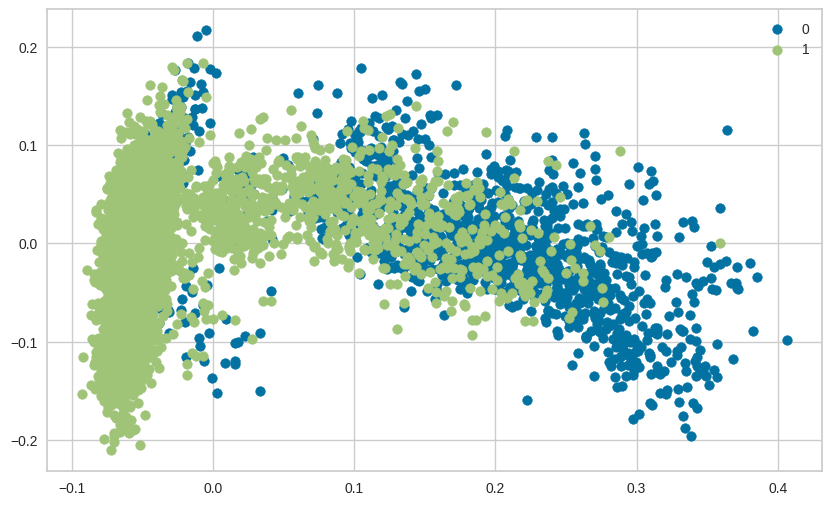

In [ ]:
#training the K-means model on a dataset  
Agmodel = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward') 

#predict the labels of clusters.
plt.figure(figsize=(10,6))
label = Agmodel.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Add cluster values to the dateframe.
df_new['agglomerative_cluster'] = Agmodel.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df_new[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]
  
  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])
  
  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)
  
  # Return the word cloud object
  return wordcloud

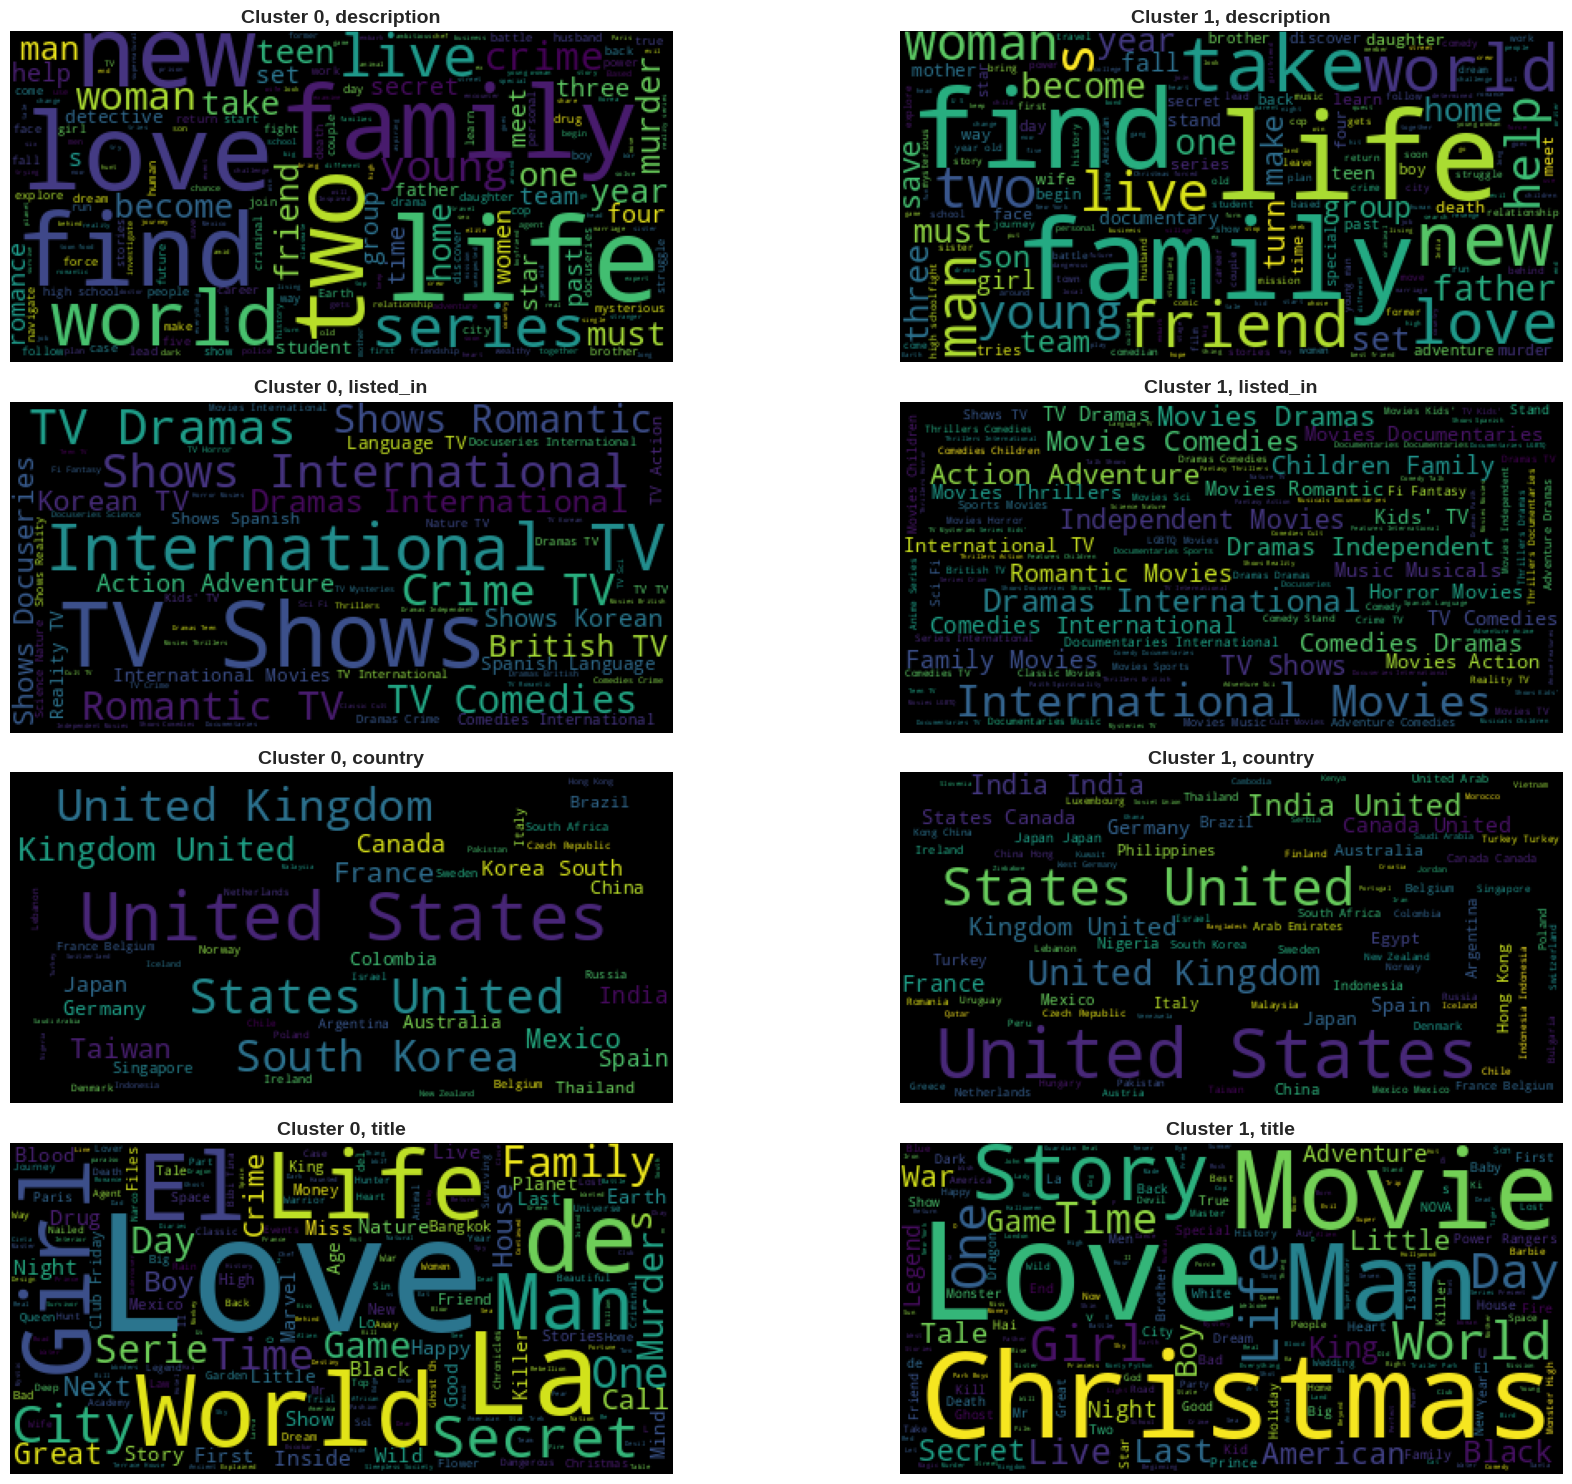

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - Building a Recommendaton System

We are using Cosine similarity as it is a measure of similarity between two non-zero vectors in a multidimensional space. It measures the cosine of the angle between the two vectors, which ranges from -1 (opposite direction) to 1 (same direction), with 0 indicating orthogonality (the vectors are perpendicular to each other).

We have used cosine similarity which is used to determine how similar two documents or pieces of text are. We represent the documents as vectors in a high-dimensional space, where each dimension represents a word or term in the corpus. We can then calculate the cosine similarity between the vectors to determine how similar the documents are based on their word usage.

We'll are using cosine similarity over tf-idf because:

Cosine similarity handles high dimensional sparse data better.

Cosine similarity captures the meaning of the text better than tf-idf. For example, if two items contain similar words but in different orders, cosine similarity would still consider them similar, while tf-idf may not. This is because tf-idf only considers the frequency of words in a document and not their order or meaning.

In [ ]:

# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_new['detail'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=df_new):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index 
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table


In [ ]:
# Testing indian movie
recommend_content('Kal Ho Naa Ho')

Recommendation  Similarity_score(0-1)
0                                     Dil Chahta Hai                 0.2313
1                                 Kuch Kuch Hota Hai                 0.1786
2                              Together For Eternity                 0.1735
3  My Next Guest with David Letterman and Shah Ru...                 0.1700
4                                          Kya Kehna                 0.1694
5                               Kabhi Haan Kabhi Naa                 0.1671
6                             Kabhi Alvida Naa Kehna                 0.1591
7                                      Chalte Chalte                 0.1584
8                           Kabhi Khushi Kabhie Gham                 0.1551
9                              Main aurr Mrs. Khanna                 0.1518

In [ ]:
# Testing non indian movie
recommend_content('Zombieland')

Recommendation  Similarity_score(0-1)
0                            30 Minutes or Less                 0.1247
1                                       Kingpin                 0.0921
2                                 THE RUM DIARY                 0.0817
3                       The Hummingbird Project                 0.0774
4                                3 Days to Kill                 0.0765
5                               No Reservations                 0.0733
6                         The Edge of Seventeen                 0.0718
7                                The Highwaymen                 0.0713
8                            My Sister's Keeper                 0.0708
9  The Massively Mixed-Up Middle School Mystery                 0.0696

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have chosen Silhoutte Score as evaluation metrics as it is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1. 1: Means clusters are well apart from each other and clearly distinguished.assigned to the wrong cluster.

 In other words, silhouette coefficients close to +1 means the sample is far away from the neighboring clusters. A value of 0 means that the sample is on or very close to the decision boundary between two neighboring clusters. Finally, negative values indicate that the samples could have potentially been assigned to the wrong cluster.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have considered K-means as our final model, as we are getting the comparatevely high Silhoutte Score in K-means clustering and the resulted clusters are very well seperated from each others.

Also in some of the situations K-means works more accurately then other clustering methods such as:
* Speed: K-means is generally faster than hierarchical clustering, especially when dealing with large datasets, since it involves fewer calculations and iterations.

* Ease of use: K-means is relatively straightforward to implement and interpret, as it requires only a few parameters (such as the number of clusters) and produces a clear partitioning of the data.

* Scalability: K-means can easily handle datasets with a large number of variables or dimensions, whereas hierarchical clustering becomes computationally expensive as the number of data points and dimensions increase.

* Independence of clusters: K-means produces non-overlapping clusters, whereas hierarchical clustering can produce overlapping clusters or clusters that are nested within each other, which may not be ideal for certain applications.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Based on the exploratory data analysis (EDA) of the Netflix movies and TV shows clustering dataset, we have drawn the following conclusions:

* 69.14% are movies and 30.86% are tv-shows. Majority of content type in netflix dataset is movies.
* TV-MA("Mature Audience") is the most common rating for both movies and TV shows, Netflix can continue to focus on producing and acquiring content that appeals to adult audiences. Where as very less number of Movies and TV shows for kids are available on Netflix.
* The growth rate of movie releases on Netflix is significantly faster than that of TV shows.
* Since 2015, there has been a substantial increase in the number of movies and TV show episodes available on Netflix.
* It appears that Netflix has given more attention to increasing its movie content rather than TV shows, as the growth rate of movies has been much more significant than that of TV shows.
* Netflix adds the highest number of movies and TV shows during the period between October and January.
* International movies are the most popular genre, followed by drama and comedy, in both the movies and TV shows categories on Netflix.
* the majority of the movies have a duration between 50 to 150 minutes.
* United States is the largest producer of both movies and TV shows on Netflix, followed by India, which is the largest producer of movies.
* Japan and South Korea produce more TV shows than movies on Netflix, indicating an opportunity for growth by acquiring and producing more TV shows from these countries.

* Most countries produce content related to adult and teen categories, with India having kidsontent. Spain produces the most adult content, while Canada produces more content related to kids categories.


Our goal was to cluster the shows into groups based on their similarities and differences, ultimately creating a content-based recommender system that suggests 10 shows based on the user's viewing history.

With over 7787 records and 11 attributes, we began our adventure by delving into the dataset's missing values and performing exploratory data analysis (EDA). Our findings revealed that Netflix boasts more movies than TV shows, with a rapidly growing collection of shows from the United States.

To cluster the shows, we focused on six key attributes: director, cast, country, genre, rating, and description. We transformed these attributes into a 10000-feature TFIDF vectorization, then used Principal Component Analysis (PCA) to tackle the curse of dimensionality. By reducing the components, we were able to capture more than 95% of the variance.

Next, we used two clustering algorithms, K-Means and Agglomerative clustering, to group the shows. K-Means determined that the optimal number of clusters was 4, as confirmed by the elbow method and Silhouette score analysis. Meanwhile, Agglomerative clustering suggested 2 clusters, which we visualized using a dendrogram.

Afer that we created a content-based recommender system using the similarity matrix obtained through cosine similarity. This system provides personalized recommendations based on the type of show the user has watched, giving them 10 top-notch suggestions to explore.

Our goal was to cluster the shows into groups based on their similarities and differences, ultimately creating a content-based recommender system that suggests 10 shows based on the user's viewing history.

With over 7787 records and 11 attributes, we began our adventure by delving into the dataset's missing values and performing exploratory data analysis (EDA). Our findings revealed that Netflix boasts more movies than TV shows, with a rapidly growing collection of shows from the United States.

To cluster the shows, we focused on six key attributes: director, cast, country, genre, rating, and description. We transformed these attributes into a 10000-feature TFIDF vectorization, then used Principal Component Analysis (PCA) to tackle the curse of dimensionality. By reducing the components, we were able to capture more than 95% of the variance.

Next, we used two clustering algorithms, K-Means and Agglomerative clustering, to group the shows. K-Means determined that the optimal number of clusters was 4, as confirmed by the elbow method and Silhouette score analysis. Meanwhile, Agglomerative clustering suggested 2 clusters, which we visualized using a dendrogram.

Afer that we created a content-based recommender system using the similarity matrix obtained through cosine similarity. This system provides personalized recommendations based on the type of show the user has watched, giving them 10 top-notch suggestions to explore.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***